# Helsinki City Bikes EDA

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
dataframe = pd.read_csv("../raw_data/database.csv", low_memory=False)


,departure,return,departure_id,departure_name,return_id,return_name,distance (m),duration (sec.),avg_speed (km/h),departure_latitude,departure_longitude,return_latitude,return_longitude,Air temperature (degC)
0,2020-03-23 06:09:44,2020-03-23 06:16:26,86,Kuusitie,111.0,Esterinportti,1747.0,401.0,0.261397,60.195245,24.901900,60.197572,24.926781,0.9
1,2020-03-23 06:11:58,2020-03-23 06:26:31,26,Kamppi (M),10.0,Kasarmitori,1447.0,869.0,0.099908,60.168610,24.930537,60.165017,24.949473,0.9
2,2020-03-23 06:16:29,2020-03-23 06:24:23,268,Porolahden koulu,254.0,Agnetankuja,1772.0,469.0,0.226695,60.195540,25.053581,60.187234,25.036412,0.9
3,2020-03-23 06:33:53,2020-03-23 07:14:03,751,Vallipolku,106.0,Korppaanmäentie,7456.0,2406.0,0.185935,60.227827,24.819614,60.203474,24.898930,0.9
4,2020-03-23 06:36:09,2020-03-23 07:04:10,62,Länsisatamankatu,121.0,Vilhonvuorenkatu,7120.0,1679.0,0.254437,60.158928,24.909692,60.186463,24.967872,0.9


In [4]:
df = dataframe.copy()

,departure,return,departure_id,departure_name,return_id,return_name,distance (m),duration (sec.),avg_speed (km/h),departure_latitude,departure_longitude,return_latitude,return_longitude,Air temperature (degC)
0,2020-03-23 06:09:44,2020-03-23 06:16:26,86,Kuusitie,111.0,Esterinportti,1747.0,401.0,0.261397,60.195245,24.901900,60.197572,24.926781,0.9
1,2020-03-23 06:11:58,2020-03-23 06:26:31,26,Kamppi (M),10.0,Kasarmitori,1447.0,869.0,0.099908,60.168610,24.930537,60.165017,24.949473,0.9
2,2020-03-23 06:16:29,2020-03-23 06:24:23,268,Porolahden koulu,254.0,Agnetankuja,1772.0,469.0,0.226695,60.195540,25.053581,60.187234,25.036412,0.9
3,2020-03-23 06:33:53,2020-03-23 07:14:03,751,Vallipolku,106.0,Korppaanmäentie,7456.0,2406.0,0.185935,60.227827,24.819614,60.203474,24.898930,0.9
4,2020-03-23 06:36:09,2020-03-23 07:04:10,62,Länsisatamankatu,121.0,Vilhonvuorenkatu,7120.0,1679.0,0.254437,60.158928,24.909692,60.186463,24.967872,0.9


In [7]:
df = dataframe.copy()

In [8]:
df.shape


(12157458, 14)

In [9]:
df.columns

Index(['departure', 'return', 'departure_id', 'departure_name', 'return_id',
       'return_name', 'distance (m)', 'duration (sec.)', 'avg_speed (km/h)',
       'departure_latitude', 'departure_longitude', 'return_latitude',
       'return_longitude', 'Air temperature (degC)'],
      dtype='object')

In [10]:
df.isna().sum()

departure                     0
return                        0
departure_id                  0
departure_name                0
return_id                     0
return_name                   0
distance (m)                  0
duration (sec.)               0
avg_speed (km/h)           3550
departure_latitude            0
departure_longitude           0
return_latitude               1
return_longitude              1
Air temperature (degC)    15902
dtype: int64

In [11]:
df.dropna(inplace=True)

In [12]:
df.isna().sum()

departure                 0
return                    0
departure_id              0
departure_name            0
return_id                 0
return_name               0
distance (m)              0
duration (sec.)           0
avg_speed (km/h)          0
departure_latitude        0
departure_longitude       0
return_latitude           0
return_longitude          0
Air temperature (degC)    0
dtype: int64

In [14]:
df[['departure','return']] =  df[['departure','return']].apply(pd.to_datetime, format='%Y-%m-%d %H:%M:%S.%f')

#### Rename Columns

In [15]:
df = df.rename(columns={'distance (m)': 'distance',
                                     'duration (sec.)': 'duration',
                                     'avg_speed (km/h)':'speed',
                                      'Air temperature (degC)':'temperature',
                                     })

In [12]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df[["distance", "duration", "temperature"]].describe()

,distance,duration,temperature
count,12138008.000,12138008.000,12138008.000
mean,2296.183,960.187,15.650
std,24540.204,7351.542,5.498
min,-4292467.000,1.000,-5.200
25%,1000.000,344.000,12.300
50%,1739.000,586.000,16.400
75%,2869.000,971.000,19.300
max,3681399.000,5401659.000,32.900


#### Removing Extreme Values

In [30]:
df = df[(df['distance'] > 50) & (df['distance'] < 10000) &
        (60 < df['duration']) & (df['duration'] <  18000)]

In [31]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df[["distance", "duration", "temperature"]].describe()

,distance,duration,temperature
count,11347235.000,11347235.000,11347235.000
mean,2230.713,779.487,15.634
std,1497.806,795.193,5.495
min,51.000,61.000,-5.200
25%,1109.000,376.000,12.300
50%,1837.000,612.000,16.400
75%,2954.000,988.000,19.300
max,9999.000,17998.000,32.900


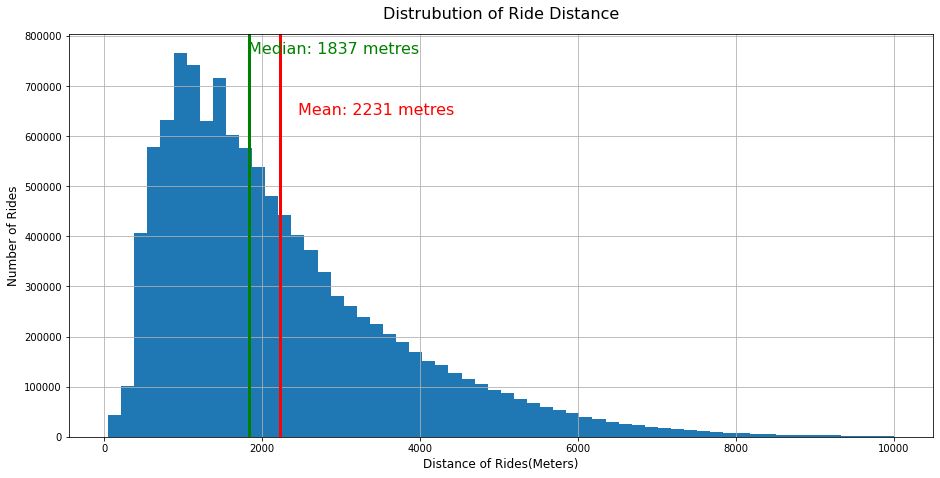

In [40]:
fig = plt.figure(figsize=(15,7))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

distance = df["distance"]
plt.hist(distance, bins = 60)
ax.grid(zorder=0)

# adding mean and median lines
plt.axvline(distance.mean(), color='red', linestyle='-', linewidth=3 )
plt.axvline(distance.median(), color='green', linestyle='-', linewidth=3 )

min_ylim, max_ylim = plt.ylim()
plt.text(distance.mean()*1.1, max_ylim*0.8, 'Mean: {:.0f} metres'.format(distance.mean()), color = 'red',  fontsize= 16)
plt.text(distance.median()-10, max_ylim*0.95, 'Median: {:.0f} metres'.format(distance.median()), color = 'green', fontsize= 16)


# plot x,y labels
plt.xlabel("Distance of Rides(Meters)", fontsize= 12, x = 0.5)
plt.ylabel("Number of Rides", fontsize= 12)

plt.title('Distrubution of Ride Distance', fontdict={"fontsize":16}, pad = 15);



#### Visualising the data

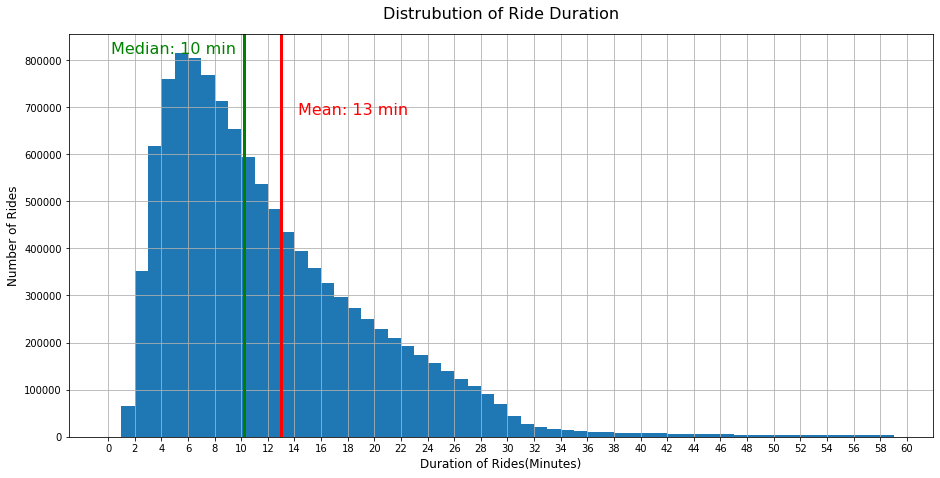

In [44]:
df_ = df.copy()
    
# Converting seconds to minutes
df_["duration"] = df_["duration"]/60
    
# Filtering relevant data
duration = df_["duration"]
fig = plt.figure(figsize=(15,7))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.grid(zorder=0)
plt.hist(duration, bins= range(60), histtype ="bar")

# adding mean and median lines
plt.axvline(duration.mean(), color='red', linestyle='-', linewidth=3 )
plt.axvline(duration.median(), color='green', linestyle='-', linewidth=3 )


# plot x,y labels
plt.xlabel("Duration of Rides(Minutes)", fontsize= 12, x = 0.5)
plt.ylabel("Number of Rides", fontsize= 12)

min_ylim, max_ylim = plt.ylim()
plt.text(duration.mean()*1.1, max_ylim*0.8, 'Mean: {:.0f} min'.format(duration.mean()), color = 'red',  fontsize= 16)
plt.text(duration.median()-10, max_ylim*0.95, 'Median: {:.0f} min'.format(duration.median()), color = 'green', fontsize= 16)

# plot ticks
ticks =range(0, 62, 2)
plt.xticks(ticks)
ticks =range(0, 3600, 2000)

plt.title('Distrubution of Ride Duration', fontdict={"fontsize":16}, pad = 15);

